<a href="https://colab.research.google.com/github/jose-izv/PIA_automobile/blob/main/PIA_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos

In [1]:
!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

## Asignar dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
             'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
             'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
             'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
             'highway-mpg', 'price']

df = pd.read_csv('datasets/imports-85.data', names = feature_names, na_values = '?')

In [4]:
print(len(df))

205


In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Preparación de los datos

In [7]:
def print_cols_with_missing_values(df):
  cols_with_missing = df.isnull().sum()
  print(cols_with_missing[cols_with_missing > 0])

print_cols_with_missing_values(df)

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [13]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mean(), inplace=True)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
df.dropna(subset=['price'], inplace=True)
df.reset_index(drop = True, inplace = True)
print_cols_with_missing_values(df)

Series([], dtype: int64)


# Normalización de los datos

In [14]:
target = 'price'

numeric_feature_names = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_feature_names.remove(target)
categorical_feature_names = df.select_dtypes(include=['object']).columns.tolist()

all_feature_names = numeric_feature_names + categorical_feature_names

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')
print(f'Propiedad objetivo: {target}')

Propiedades numéricas: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] (15)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] (10)
Propiedad objetivo: price


<ipython-input-15-8a11ce591e43>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>, <Axes: >]], dtype=object)

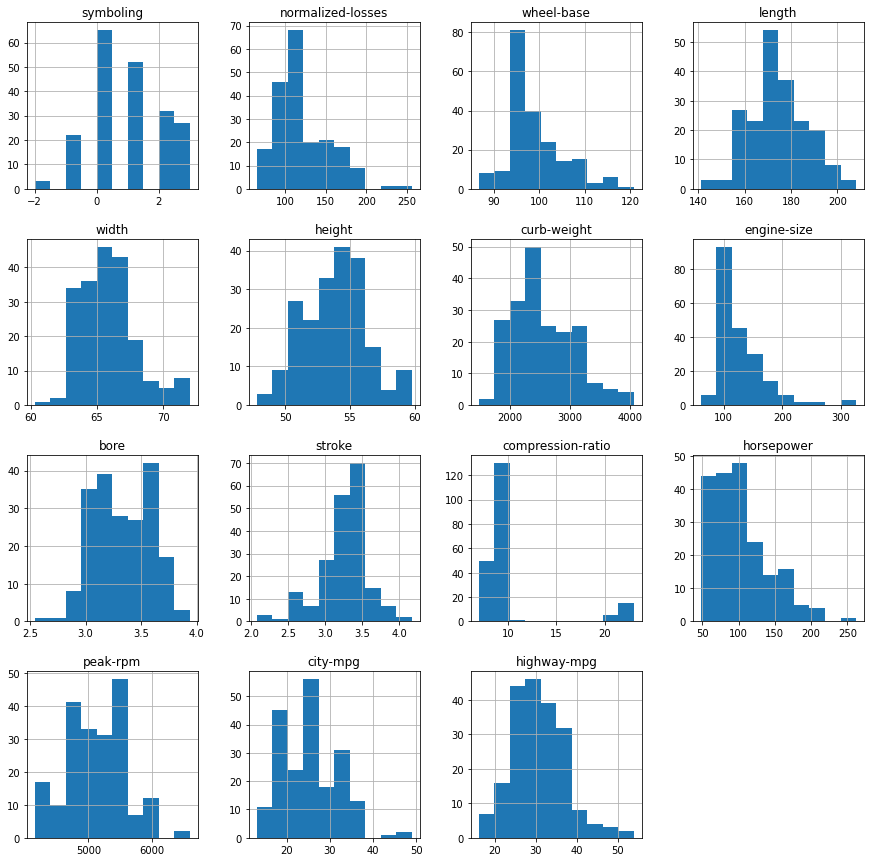

In [15]:
import matplotlib.pyplot as plt
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

In [16]:
import seaborn as sns
import tempfile
def draw_hist_boxplot(df, feature_name):
  sns.boxplot(x = feature_name, data = df)
  sns.stripplot(x = feature_name, data = df, color = "#474646")
  plt.show()

def replace_outliers_with_median(df, feature_name):
  Q1 = df[feature_name].quantile(0.25)
  median = df[feature_name].quantile(0.5)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR
  df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                              (df[feature_name] > upper_whisker), 
                                median, 
                                df[feature_name])

Dibujamos con los atributos y le remplazamos los outliers

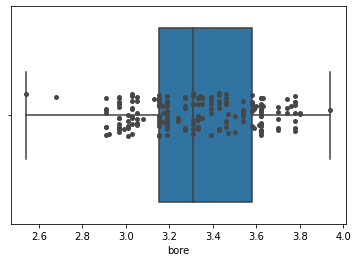

In [17]:
# dibujamos el diagrama y los puntos, y vemos si hay outliers
draw_hist_boxplot(df, 'bore')

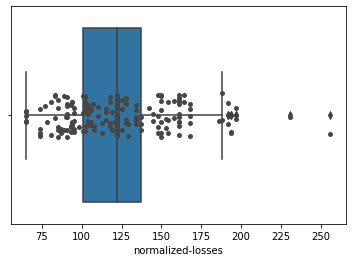

In [18]:
draw_hist_boxplot(df, 'normalized-losses')

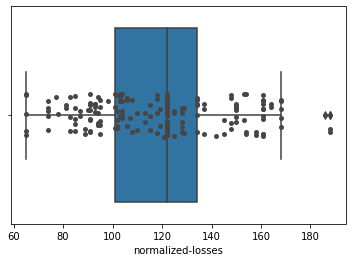

In [19]:
# remplazamos los outliers y lo dibujamos de nuevo
replace_outliers_with_median(df, 'normalized-losses')
draw_hist_boxplot(df, 'normalized-losses')

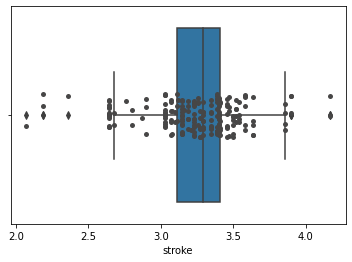

In [20]:
# dibujamos con el atributo stroke
draw_hist_boxplot(df, 'stroke')

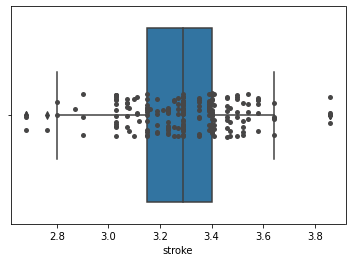

In [21]:
# reemplazamos de nuevo los outliers del atributo stroke y volvemos a dibujar
replace_outliers_with_median(df, 'stroke')
draw_hist_boxplot(df, 'stroke')

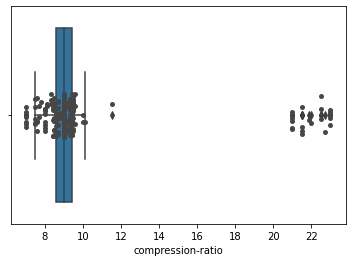

In [22]:
# ahora con el atributo compression-ratio
draw_hist_boxplot(df, 'compression-ratio')

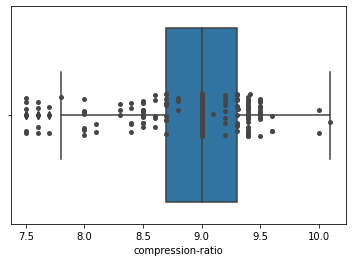

In [23]:
# reemplazamos los outliers de compression-ratio y volvemos a dibujar
replace_outliers_with_median(df, 'compression-ratio')
draw_hist_boxplot(df, 'compression-ratio')

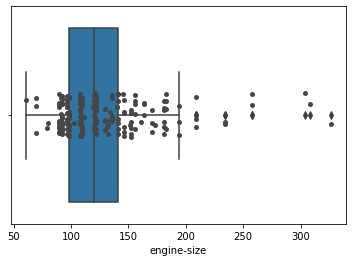

In [24]:
# ahora con el atributo engine-size
draw_hist_boxplot(df, 'engine-size')

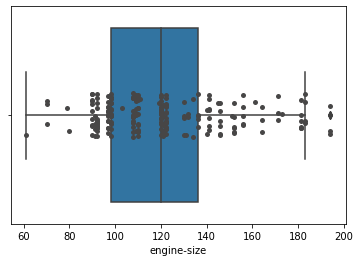

In [25]:
# reemplazamos los outliers de engine-size y volvemos a dibujar
replace_outliers_with_median(df, 'engine-size')
draw_hist_boxplot(df, 'engine-size')

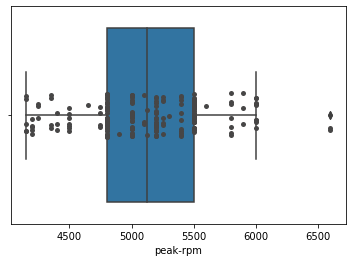

In [27]:
# atributo peak-rpm
draw_hist_boxplot(df, 'peak-rpm')

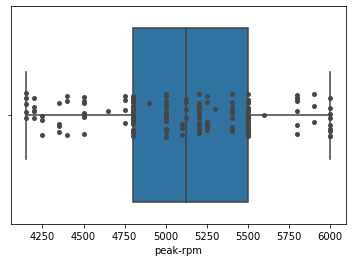

In [28]:
# reemplazamos los outliers de peak-rpm y dibujamos de nuevo
replace_outliers_with_median(df, 'peak-rpm')
draw_hist_boxplot(df, 'peak-rpm')

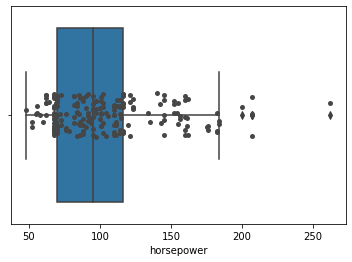

In [29]:
# atributo horsepower
draw_hist_boxplot(df, 'horsepower')

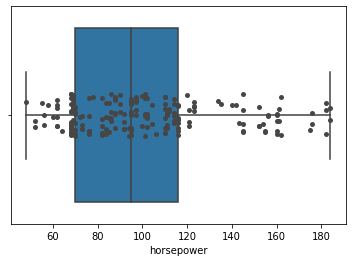

In [30]:
# reemplazamos outliers de horsepower y volvemos a dibujar
replace_outliers_with_median(df, 'horsepower')
draw_hist_boxplot(df, 'horsepower')

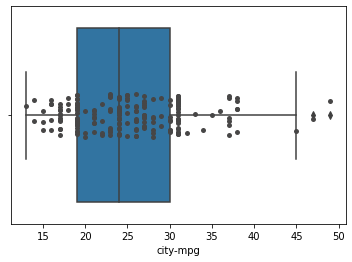

In [31]:
# atributo city-mpg
draw_hist_boxplot(df, 'city-mpg')

In [34]:
def extraerOutlayers(df,columna):
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)

  IQR = Q3 - Q1

  limInf = Q1 - 1.5 * IQR
  limSup = Q3 + 1.5 * IQR

  outliers = df[(df[columna] < limInf) | (df[columna] > limSup)][columna]

  return outliers

In [35]:
extraerOutlayers(df,'city-mpg')

17    47
29    49
Name: city-mpg, dtype: int64

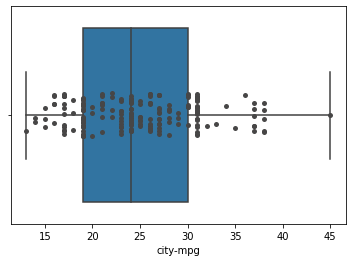

In [36]:
# en el caso del atributo city-mpg vamos a eliminar los valores atípicos del conjunto de datos pues son solo unos pocos
df.drop(df.loc[df['city-mpg'] > 46].index, inplace = True)
draw_hist_boxplot(df, 'city-mpg')

<ipython-input-37-0ed257604fbe>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>, <Axes: >]], dtype=object)

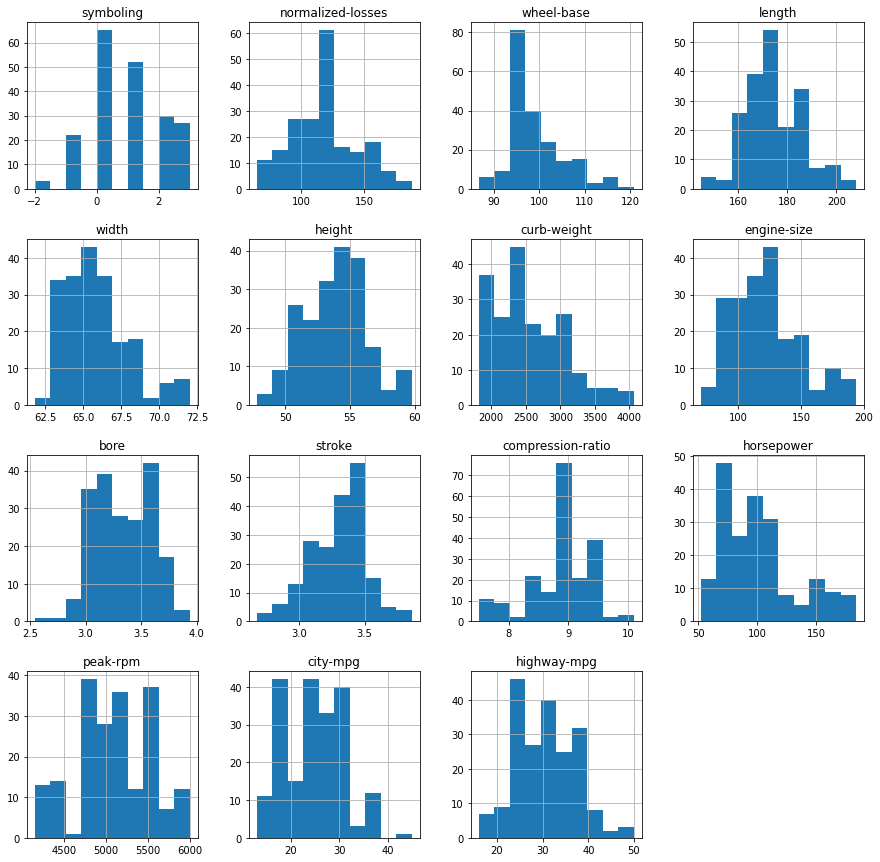

In [37]:
# mostramos de nuevo los histogramas para ver el nuevo aspecto que tienen
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

<ipython-input-38-d1a2407358da>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>, <Axes: >]], dtype=object)

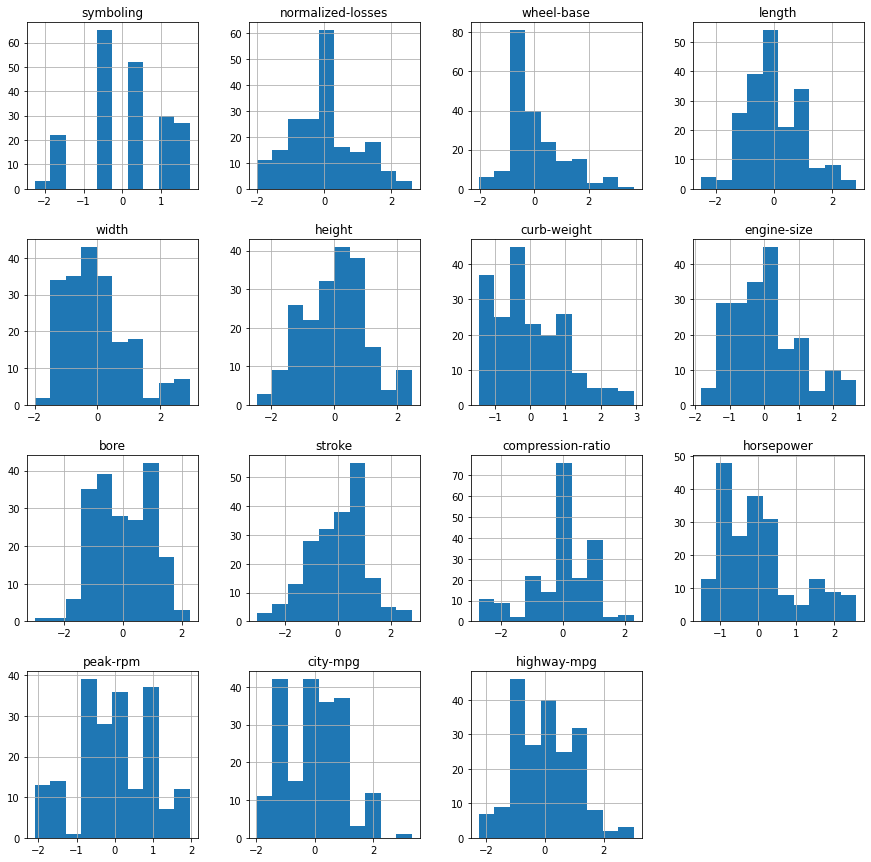

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_feature_names] = scaler.fit_transform(df[numeric_feature_names])

df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

# Importancia de las propiedades y división del conjunto de datos

Analizaremos ahora el impacto de las propiedades sobre la variable objetivo.Recurriremos a un mapa de calor que muestre las correlaciones que existen entre todas las variables.

<Axes: >

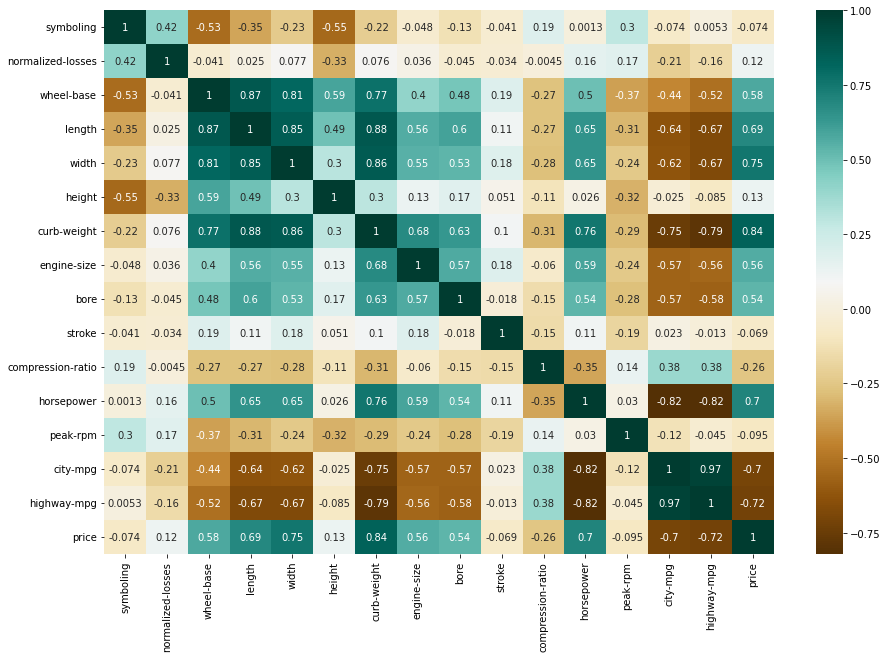

In [39]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)

In [40]:
df = df.drop(['symboling'], axis=1)
df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.130509,alfa-romero,gas,std,two,convertible,rwd,front,-1.726065,-0.478688,...,0.341233,mpfi,0.509006,-3.073377,0.171938,0.314884,-0.229763,-0.656758,-0.537362,13495.0
1,0.130509,alfa-romero,gas,std,two,convertible,rwd,front,-1.726065,-0.478688,...,0.341233,mpfi,0.509006,-3.073377,0.171938,0.314884,-0.229763,-0.656758,-0.537362,16500.0
2,0.130509,alfa-romero,gas,std,two,hatchback,rwd,front,-0.738360,-0.277702,...,1.140119,mpfi,-2.467847,0.861783,0.171938,1.649773,-0.229763,-0.989315,-0.692791,16500.0
3,1.709080,audi,gas,std,four,sedan,fwd,front,0.148900,0.174516,...,-0.421340,mpfi,-0.546081,0.513098,2.107213,0.035488,0.869265,-0.157923,-0.071076,13950.0
4,1.709080,audi,gas,std,four,sedan,4wd,front,0.081937,0.174516,...,0.559111,mpfi,-0.546081,0.513098,-1.763337,0.439059,0.869265,-1.155593,-1.314507,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-0.884287,volvo,gas,std,four,sedan,rwd,front,1.705791,1.196195,...,0.740676,mpfi,1.677138,-0.732206,1.139575,0.408015,0.649459,-0.324201,-0.381933,16845.0
197,-0.884287,volvo,gas,turbo,four,sedan,rwd,front,1.705791,1.196195,...,0.740676,mpfi,1.677138,-0.732206,-0.408644,1.836037,0.429654,-0.989315,-0.848220,19045.0
198,-0.884287,volvo,gas,std,four,sedan,rwd,front,1.705791,1.196195,...,1.902692,mpfi,0.923504,-2.126946,-0.215117,1.028894,0.869265,-1.155593,-1.159078,21485.0
199,-0.884287,volvo,diesel,turbo,four,sedan,rwd,front,1.705791,1.196195,...,0.885928,idi,-1.224352,0.513098,0.171938,0.159664,-0.669374,0.174634,-0.537362,22470.0


Mostraremos diagramas de diferentes variables en funcion del precio

<Axes: xlabel='body-style', ylabel='price'>

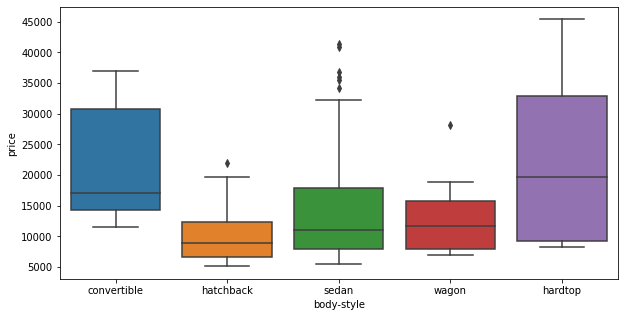

In [41]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'body-style', y = 'price', data = df)

<Axes: xlabel='aspiration', ylabel='price'>

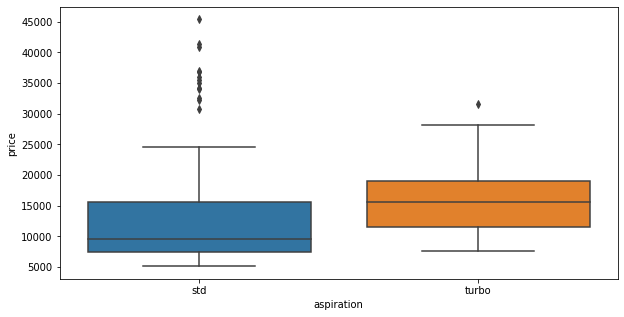

In [42]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'aspiration', y = 'price', data = df)

<Axes: xlabel='fuel-system', ylabel='price'>

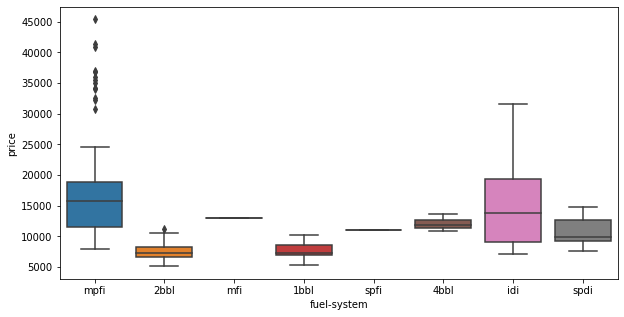

In [43]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fuel-system', y = 'price', data = df)

<Axes: xlabel='drive-wheels', ylabel='price'>

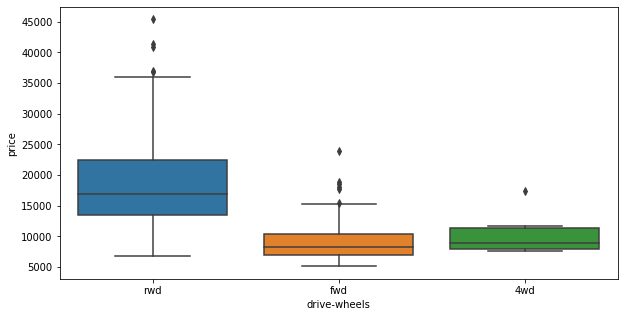

In [44]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

In [45]:
numeric_feature_names = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_feature_names.remove(target)
categorical_feature_names = df.select_dtypes(include=['object']).columns.tolist()

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')

all_feature_names = numeric_feature_names + categorical_feature_names

Propiedades numéricas: ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] (14)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] (10)


In [47]:
df[numeric_feature_names].head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.130509,-1.726065,-0.478688,-0.885243,-2.039000,-0.033891,0.341233,0.509006,-3.073377,0.171938,0.314884,-0.229763,-0.656758,-0.537362
1,0.130509,-1.726065,-0.478688,-0.885243,-2.039000,-0.033891,0.341233,0.509006,-3.073377,0.171938,0.314884,-0.229763,-0.656758,-0.537362
2,0.130509,-0.738360,-0.277702,-0.206946,-0.566332,0.505893,1.140119,-2.467847,0.861783,0.171938,1.649773,-0.229763,-0.989315,-0.692791
3,1.709080,0.148900,0.174516,0.132202,0.210910,-0.448053,-0.421340,-0.546081,0.513098,2.107213,0.035488,0.869265,-0.157923,-0.071076
4,1.709080,0.081937,0.174516,0.229102,0.210910,0.507856,0.559111,-0.546081,0.513098,-1.763337,0.439059,0.869265,-1.155593,-1.314507


In [46]:
df[categorical_feature_names].head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [49]:
from sklearn.model_selection import train_test_split

X_train_full, X_test = train_test_split(df[all_feature_names + [target]], test_size = 0.2, random_state = 1)
X_train, X_val = train_test_split(X_train_full, test_size = 0.35, random_state = 1)

y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis = 1, inplace = True)
X_val.drop([target], axis = 1, inplace = True)
X_test.drop([target], axis = 1, inplace = True)

X_train.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
175,0.130509,0.667864,0.752351,0.858949,-0.729962,0.884724,1.830066,-0.244628,0.264037,0.752520,...,toyota,gas,std,two,hatchback,rwd,front,dohc,six,mpfi
47,-0.546022,-0.972731,-1.291006,-0.836793,0.129095,-1.325449,-1.074975,-1.148988,-0.732206,0.171938,...,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
102,0.130509,-1.274064,-0.319574,0.955848,-1.670833,1.126155,2.193197,0.358279,-0.134460,-2.150392,...,nissan,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi
115,0.017754,-0.872286,-1.441746,-1.030592,-1.220851,-1.270489,-1.111288,-1.375078,-0.333709,0.946048,...,plymouth,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
84,0.243264,-0.437026,-0.177209,-0.255396,-0.893591,-0.318505,-0.385027,-0.621445,0.811971,-2.730974,...,mitsubishi,gas,turbo,four,sedan,fwd,front,ohc,four,spdi


# Ingeniería de propiedades

In [51]:
train_dict = X_train[all_feature_names].to_dict(orient = 'records')
dict(sorted(train_dict[0].items()))

{'aspiration': 'std',
 'body-style': 'hatchback',
 'bore': -0.24462803425599844,
 'city-mpg': -0.9893145656064076,
 'compression-ratio': 0.7525203414906869,
 'curb-weight': 0.8847240463122479,
 'drive-wheels': 'rwd',
 'engine-location': 'front',
 'engine-size': 1.8300664046526876,
 'engine-type': 'dohc',
 'fuel-system': 'mpfi',
 'fuel-type': 'gas',
 'height': -0.729961615842664,
 'highway-mpg': -1.003648999899683,
 'horsepower': 1.8670807158607476,
 'length': 0.7523505829356283,
 'make': 'toyota',
 'normalized-losses': 0.13050879764989035,
 'num-of-cylinders': 'six',
 'num-of-doors': 'two',
 'peak-rpm': 0.2098482455642747,
 'stroke': 0.26403715696412317,
 'wheel-base': 0.6678636862291726,
 'width': 0.8589487477877656}

In [52]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        , -0.24462803, -0.98931457,  0.75252034,
        0.88472405,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  1.8300664 ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        , -0.72996162, -1.003649  ,  1.86708072,  0.75235058,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.1305088 ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.20984825,
        0.26403716,  0.66786369,  0.85894875])

In [53]:
dv.get_feature_names_out()

array(['aspiration=std', 'aspiration=turbo', 'body-style=convertible',
       'body-style=hardtop', 'body-style=hatchback', 'body-style=sedan',
       'body-style=wagon', 'bore', 'city-mpg', 'compression-ratio',
       'curb-weight', 'drive-wheels=4wd', 'drive-wheels=fwd',
       'drive-wheels=rwd', 'engine-location=front',
       'engine-location=rear', 'engine-size', 'engine-type=dohc',
       'engine-type=l', 'engine-type=ohc', 'engine-type=ohcf',
       'engine-type=ohcv', 'engine-type=rotor', 'fuel-system=1bbl',
       'fuel-system=2bbl', 'fuel-system=4bbl', 'fuel-system=idi',
       'fuel-system=mpfi', 'fuel-system=spdi', 'fuel-type=diesel',
       'fuel-type=gas', 'height', 'highway-mpg', 'horsepower', 'length',
       'make=alfa-romero', 'make=audi', 'make=bmw', 'make=chevrolet',
       'make=dodge', 'make=honda', 'make=jaguar', 'make=mazda',
       'make=mercedes-benz', 'make=mercury', 'make=mitsubishi',
       'make=nissan', 'make=peugot', 'make=plymouth', 'make=porsche',
   

# Entrenamiento del modelo

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.score(X_train, y_train)

0.9848561393759366

In [56]:
X_val = dv.transform(X_val[all_feature_names].to_dict(orient = 'records'))
model.score(X_val, y_val)

0.6848979048059383

In [57]:
X_test = dv.transform(X_test[all_feature_names].to_dict(orient = 'records'))
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9106601703430208

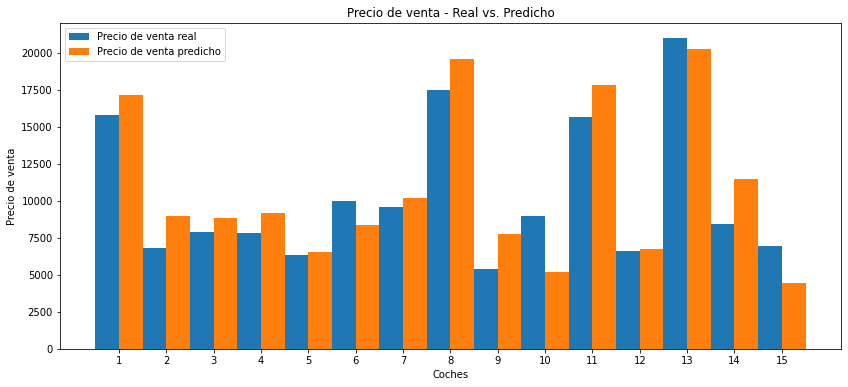

In [60]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(15)
width = 0.5

plt.figure(figsize = (14, 6))
plt.bar(ind, y_test[:15], width, label = 'Precio de venta real')
plt.bar(ind+width, y_pred[:15], width, label = 'Precio de venta predicho')

plt.xticks(ind+width / 2, np.arange(1, 16))
plt.legend(loc = 'best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Predicho')

plt.show()

# Modelo basado en una red neuronal

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()
input_shape = len(X_train[0])
print('Num entradas:',input_shape)

model.add(Dense(int(len(X_train[0])), input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(int(len(X_train[0])/2), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='glorot_uniform'))

model.summary()

Num entradas: 68
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                4692      
                                                                 
 dense_1 (Dense)             (None, 34)                2346      
                                                                 
 dense_2 (Dense)             (None, 1)                 35        
                                                                 
Total params: 7,073
Trainable params: 7,073
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [64]:
history = model.fit(X_train, y_train, epochs=500, batch_size=int(len(X_train[0])/3))

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 184896080.0000
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 181277712.0000
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 177343792.0000
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 173729808.0000
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 169768992.0000
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 165937616.0000
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 161952624.0000
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 157940480.0000
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 153817792.0000
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 150240176.0000
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 146063200.0000
Epoch 12/500
5/5 [==============================] - 

In [65]:
mse = model.evaluate(X_train, y_train)
print('MSE: %.2f' % (mse))

4/4 [==============================] - 0s 3ms/step - loss: 5078912.5000
MSE: 5078912.50


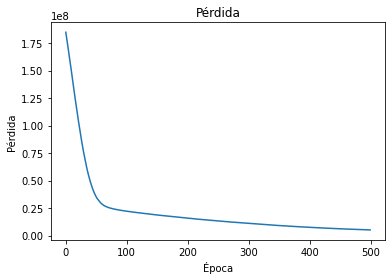

In [68]:
plt.plot(history.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()